<a href="https://colab.research.google.com/github/hawkeyedatatsai/Neural-Network-Kaggle-Challenge/blob/main/8_Neural_Network_Kaggle_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.compose import make_column_selector
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error \
                            , mean_absolute_percentage_error

#modeling
from tensorflow import keras
from keras import Sequential, metrics
from keras.layers import Dense
from keras.callbacks import EarlyStopping

#Assignment
Now, put neural networks into action. You are tasked with building a neural network using data from this [kaggle competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=sample_submission.csv). To complete the assignment, you will train and evaluate your model using only the train.csv. Remember, with Kaggle competitions, the test.csv does not include values for the target! The test.csv is only used for the competition, and you cannot evaluate your model using the test.csv without submitting your predictions to Kaggle.

#Required Task
Be sure to perform a train test split on the train.csv so you can evaluate your models.
Create and evaluate 3 iterations of a deep learning model to predict housing prices using the techniques you have learned to optimize your model's performance. Be sure to include some form of regularization with at least one model.
Select your best model!

#Data Dictionary

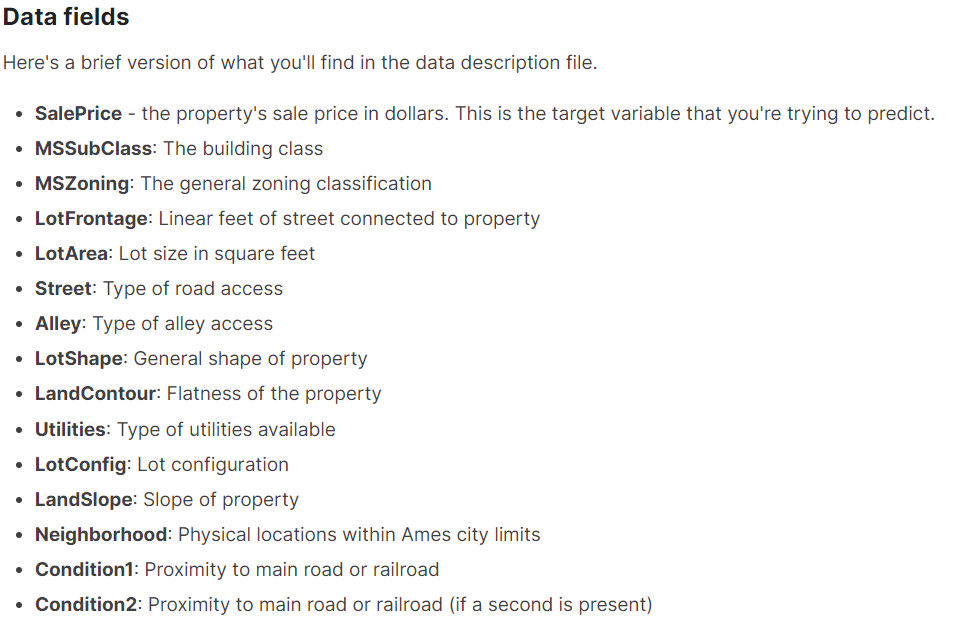

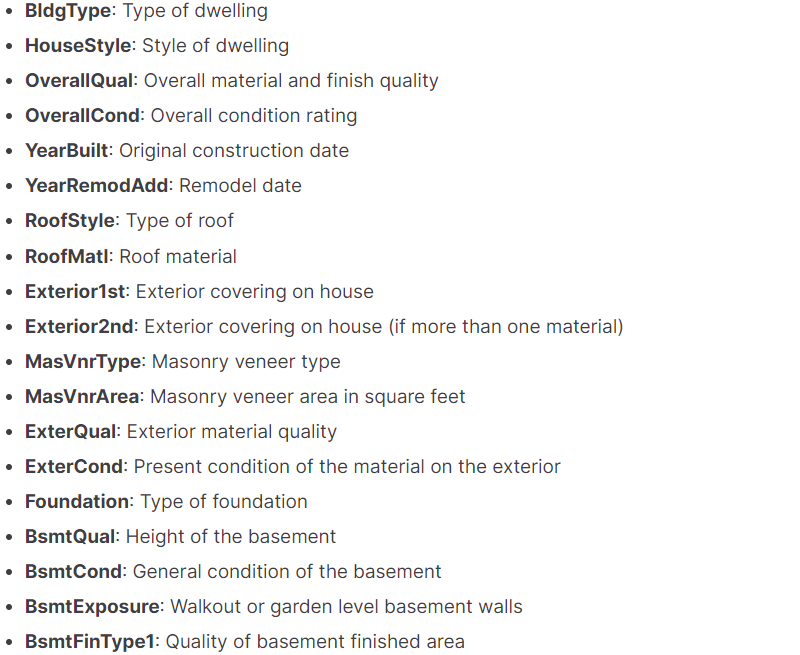

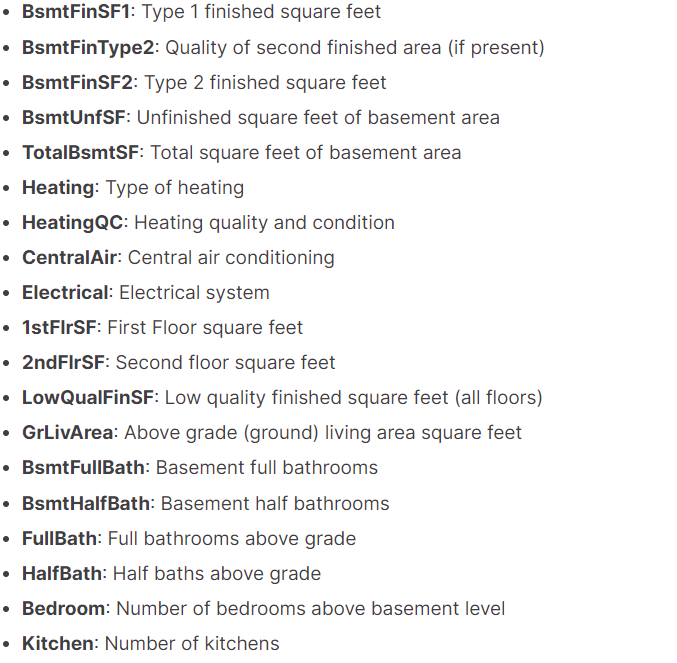

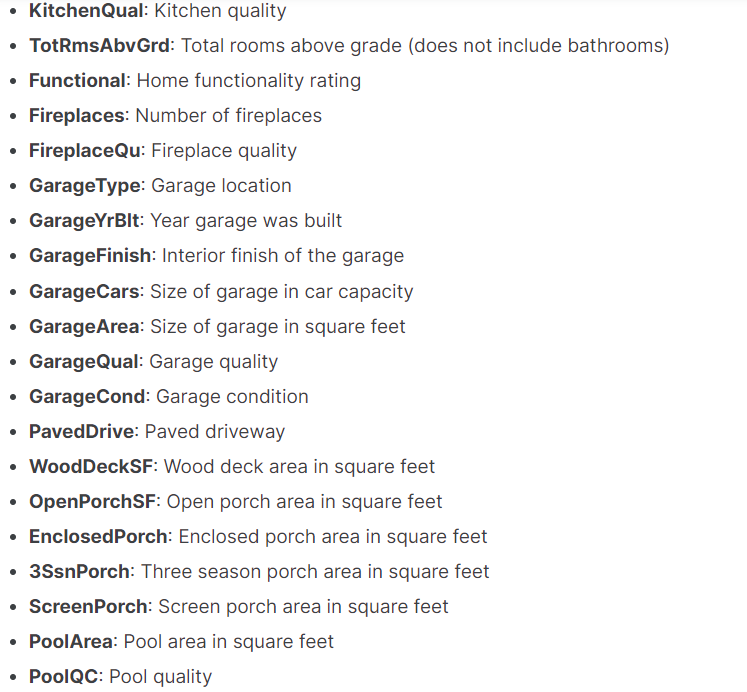

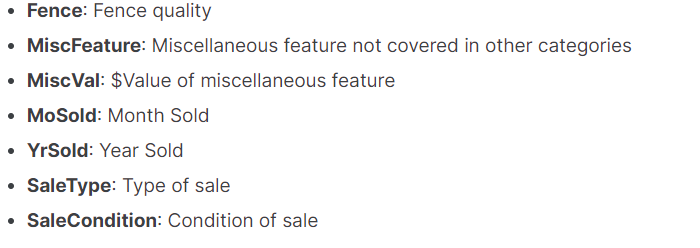

In [2]:
df = pd.read_csv('/content/8-train.csv', index_col = 'Id')
print(df.info())
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#make a copy of df for final comparison purpose
df2 = df.copy()

In [4]:
#check and drop duplicates
df.duplicated().sum()
df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
#check for missing values
pd.set_option('display.max_columns', None)
df.isna().sum()
#colab doesnt show all cols, use another way to see data

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# check values of categorical columns
cat_cols = list(df.select_dtypes(include = 'object'))
for col in cat_cols:
    print(col)
    print(df[col].value_counts(dropna = False))
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Meado

After doing EDA on all features, decide to manually drop couple columns and try feature engineering before building neural network. The standard I use to drop the columns is either  missing values or the values are the same or nearly the same in a column is 90% or more

In [8]:
#manually drop irrelevant, rebundant and low variance object features
df = df.drop(["Street", "MiscFeature", 'Alley', 'LandContour', 'Utilities', 
              'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating',
              'CentralAir', 'Functional', 'PavedDrive', 'PoolQC' , 'MiscFeature'
              ], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [9]:
print(df.info())
print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


#Feature Engineered Data

In [10]:
#create a new age of house col from two original cols to show the age of house
df["Age"] = df["YearRemodAdd"] - df["YearBuilt"]
df = df.drop(["YearBuilt", "YearRemodAdd"], axis=1)

In [11]:
#create a new column that represents the overall quality of basement
def get_basement_quality(row):
    if row["BsmtQual"] == "Ex" and row["BsmtExposure"] == "Gd" \
      and row["BsmtFinType1"] == "GLQ" \
      and row["BsmtFinType2"] == "GLQ":
        return "Excellent"
    elif row["BsmtQual"] == "Gd" and row["BsmtExposure"] == "Av" \
      and row["BsmtFinType1"] in ["GLQ", "ALQ"] \
      and row["BsmtFinType2"] in ["GLQ", "ALQ"]:
        return "Good"
    elif row["BsmtQual"] in ["TA", "Gd"] and row["BsmtExposure"] in ["Mn", "Av"] \
      and row["BsmtFinType1"] in ["GLQ", "ALQ", "BLQ"] and row["BsmtFinType2"] \
      in ["GLQ", "ALQ", "BLQ"]:
        return "Average"
    else:
        return "Poor"

df["Basement"] = df.apply(get_basement_quality, axis=1)

df = df.drop(["BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"], axis=1)

In [12]:
#create a new column to combine Exterior1st and Exterior2nd
#Define a function to combine the exterior features into a single feature
def combine_exterior(row):
    if row["Exterior1st"] == row["Exterior2nd"]:
        return row["Exterior1st"]
    else:
        return row["Exterior1st"] + "/" + row["Exterior2nd"]

# Apply the function to the "Exterior1st" and "Exterior2nd" columns to create a new "Exterior" column
df["Exterior"] = df.apply(combine_exterior, axis=1)

# Drop the original "Exterior1st" and "Exterior2nd" columns
df.drop(["Exterior1st", "Exterior2nd"], axis=1, inplace=True)

In [13]:
#combine OverallQual and OverallCond to overallscore
df["OverallScore"] = df["OverallQual"] + df["OverallCond"]
df.drop(["OverallQual", "OverallCond"], axis=1, inplace=True)

In [14]:
print(df.info())
print('\n')
print(df.shape)
print('\n')
print(df.describe())
print('\n')
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  RoofStyle      1460 non-null   object 
 11  MasVnrType     1452 non-null   object 
 12  MasVnrArea     1452 non-null   float64
 13  ExterQual      1460 non-null   object 
 14  ExterCond      1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  BsmtFinSF1     1460 non-null   int64  
 17  BsmtFinSF2     1460 non-null   int64  
 18  BsmtUnfS

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,Fence,SaleType,SaleCondition,Basement,Exterior
count,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1460,1459,1460,770,1379,1379,1379,1379,281,1460,1460,1460,1460
unique,5,4,5,25,9,5,8,6,4,4,5,6,5,5,4,5,6,3,5,5,4,9,6,3,67
top,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,Gable,None,TA,TA,PConc,Ex,SBrkr,TA,Gd,Attchd,Unf,TA,TA,MnPrv,WD,Normal,Poor,VinylSd
freq,1151,925,1052,225,1260,1220,726,1141,864,906,1282,647,741,1334,735,380,870,605,1311,1326,157,1267,1198,1450,502


##Prepare Machine Learning

In [15]:
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
#on nominal
scaler = StandardScaler()
nom_imputer = KNNImputer()
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
nom_pipeline = make_pipeline(ohe, nom_imputer, scaler)
nom_selector = make_column_selector(dtype_include="object")
nom_tuple = (nom_pipeline, nom_selector)

#on numeric
scaler = StandardScaler()
iter_imputer = IterativeImputer()
num_pipeline = make_pipeline(iter_imputer, scaler)
num_selector = make_column_selector(dtype_include="number")
num_tuple = (num_pipeline, num_selector)

#Instantiate the make column transformer
engineered_preprocessor = make_column_transformer(num_tuple, nom_tuple, remainder="drop", verbose_feature_names_out=False)
#Fit and transform
X_train_processed = engineered_preprocessor.fit_transform(X_train)
X_test_processed = engineered_preprocessor.transform(X_test)

In [17]:
#custom function  to plot our model's learning history
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

##Deep Learning Models

###Model 1

2 layers, 50% drop number of neurons per layer, without regularization.

In [18]:
#create model architecture
input_shape = X_train_processed.shape[1]
 
reg_model1 = Sequential()

#Hidden layers
reg_model1.add(Dense(input_shape, input_dim=input_shape, activation='relu'))
reg_model1.add(Dense(input_shape * 0.5, activation='relu'))

#Output layer
reg_model1.add(Dense(1, activation='linear'))
 
reg_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 246)               60762     
                                                                 
 dense_1 (Dense)             (None, 123)               30381     
                                                                 
 dense_2 (Dense)             (None, 1)                 124       
                                                                 
Total params: 91,267
Trainable params: 91,267
Non-trainable params: 0
_________________________________________________________________


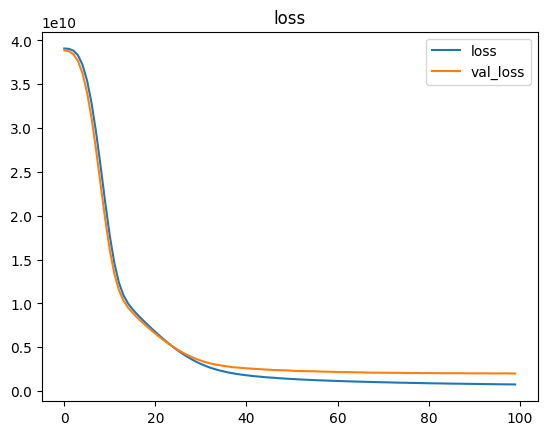

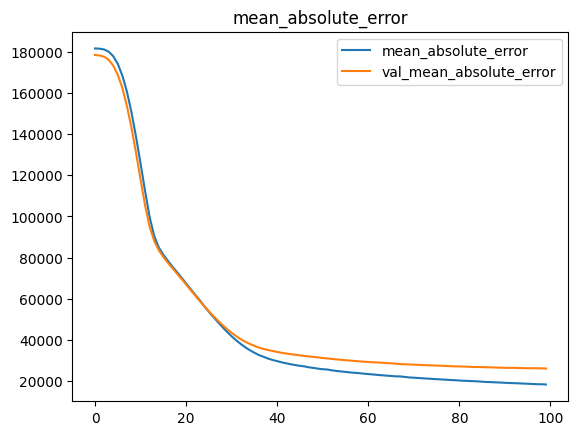

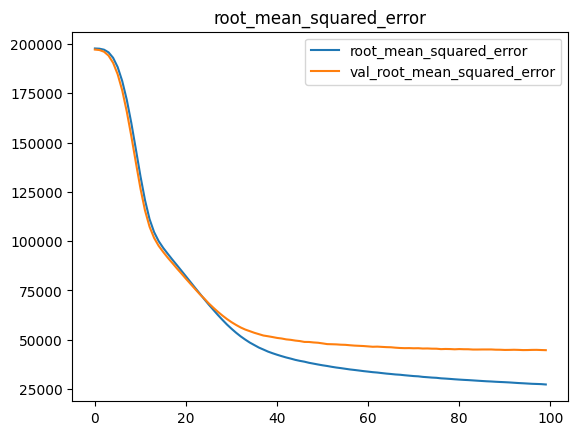

In [19]:
#compile model with additional metrics
reg_model1.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
history1 = reg_model1.fit(X_train_processed, y_train,
                        validation_data = (X_test_processed, y_test),
                        epochs=100,
                        verbose=0)
# plot learning
plot_history(history1)

###Model 2

Model 1 with regularization (Early Stopping)

In [20]:
#create model architecture
input_shape = X_train_processed.shape[1]
 
reg_model2 = Sequential()

#Hidden layers
reg_model2.add(Dense(input_shape, input_dim=input_shape, activation='relu'))
reg_model2.add(Dense(input_shape * 0.5, activation='relu'))

#Output layer
reg_model2.add(Dense(1, activation='linear'))
 
reg_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 246)               60762     
                                                                 
 dense_4 (Dense)             (None, 123)               30381     
                                                                 
 dense_5 (Dense)             (None, 1)                 124       
                                                                 
Total params: 91,267
Trainable params: 91,267
Non-trainable params: 0
_________________________________________________________________


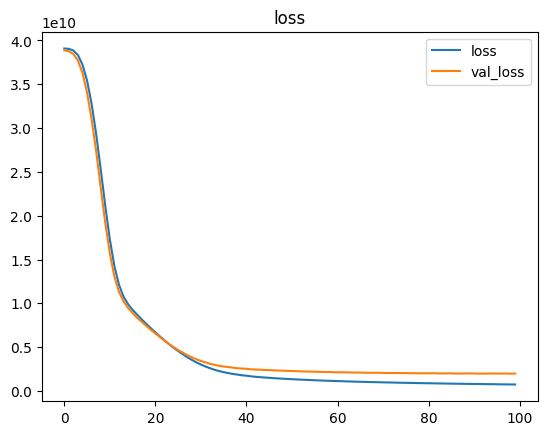

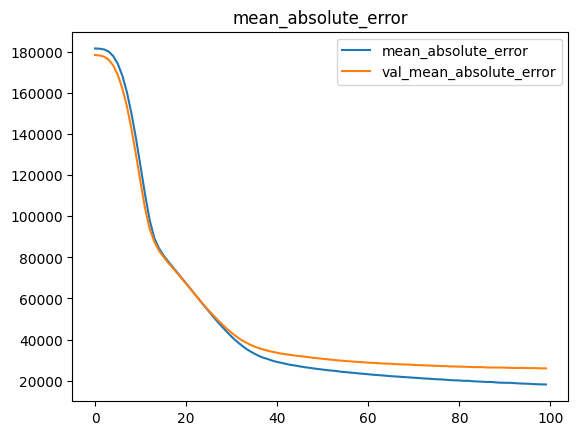

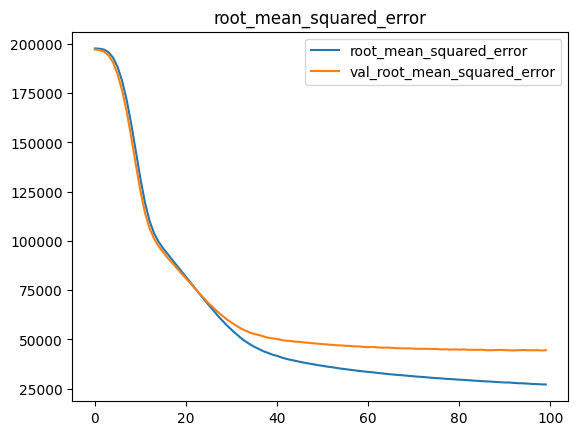

In [21]:
#compile model with additional metrics
reg_model2.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
early_stopping = EarlyStopping(patience = 5)
history2 = reg_model2.fit(X_train_processed, y_train,
                        validation_data = (X_test_processed, y_test),
                        epochs=100,
                        verbose=0)
# plot learning
plot_history(history2)

###Model 3

Model 2 with one more layer

In [22]:
#create model architecture
input_shape = X_train_processed.shape[1]
 
reg_model3 = Sequential()

#Hidden layers
reg_model3.add(Dense(input_shape, input_dim=input_shape, activation='relu'))
reg_model3.add(Dense(input_shape * 0.5, activation='relu'))
reg_model3.add(Dense(input_shape * 0.25, activation='relu'))
#Output layer
reg_model3.add(Dense(1, activation='linear'))
 
reg_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 246)               60762     
                                                                 
 dense_7 (Dense)             (None, 123)               30381     
                                                                 
 dense_8 (Dense)             (None, 61)                7564      
                                                                 
 dense_9 (Dense)             (None, 1)                 62        
                                                                 
Total params: 98,769
Trainable params: 98,769
Non-trainable params: 0
_________________________________________________________________


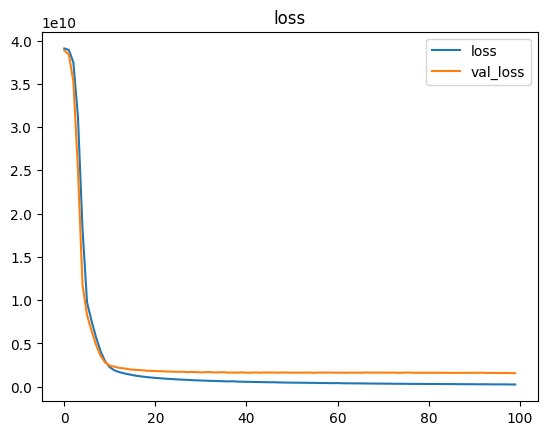

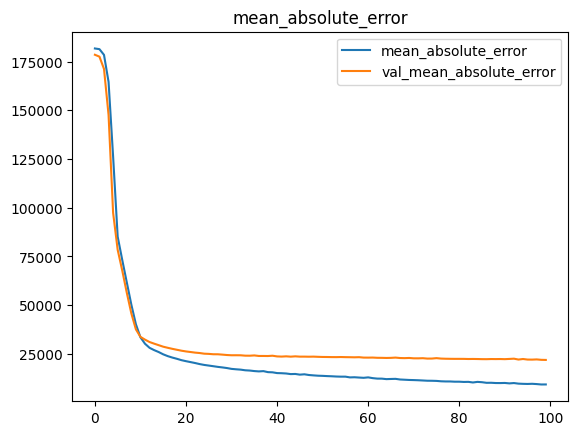

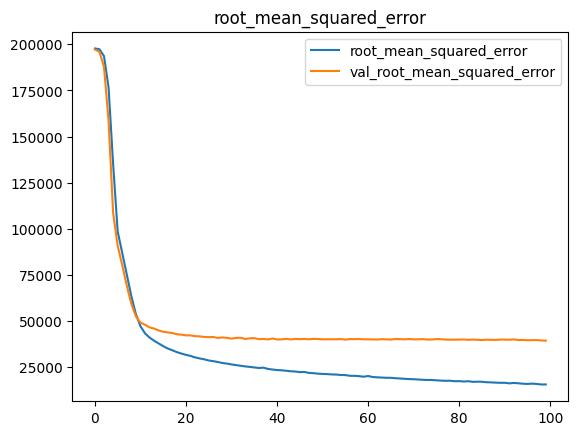

In [23]:
#compile model with additional metrics
reg_model3.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
early_stopping = EarlyStopping(patience = 5)
history3 = reg_model3.fit(X_train_processed, y_train,
                        validation_data = (X_test_processed, y_test),
                        epochs=100,
                        verbose=0)
# plot learning
plot_history(history3)

#Original Data (Without data engineering)

##Prepare Machine Learning

In [24]:
df2.info()
#original data w/o enginereed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
y = df2['SalePrice']
X = df2.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#on nominal
scaler = StandardScaler()
nom_imputer = KNNImputer()
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
nom_pipeline = make_pipeline(ohe, nom_imputer, scaler)
nom_selector = make_column_selector(dtype_include="object")
nom_tuple = (nom_pipeline, nom_selector)

#on numeric
scaler = StandardScaler()
iter_imputer = IterativeImputer()
num_pipeline = make_pipeline(iter_imputer, scaler)
num_selector = make_column_selector(dtype_include="number")
num_tuple = (num_pipeline, num_selector)

#Instantiate the make column transformer
original_preprocessor = make_column_transformer(num_tuple, nom_tuple, remainder="drop", verbose_feature_names_out=False)
#Fit and transform
original_X_train_processed = original_preprocessor.fit_transform(X_train)
original_X_test_processed = original_preprocessor.transform(X_test)

##Deep Learning Models

###Model 4

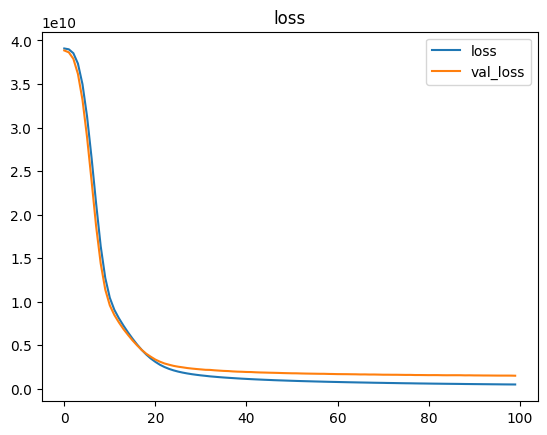

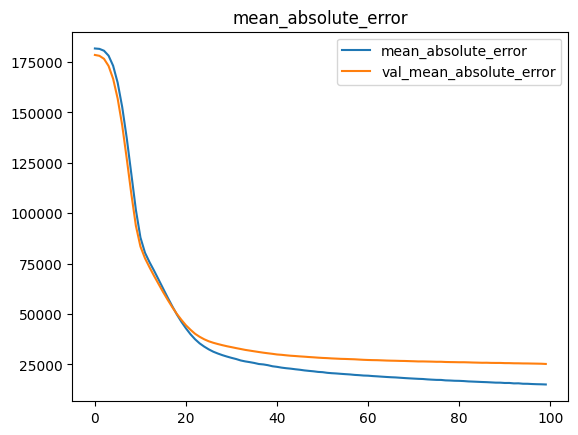

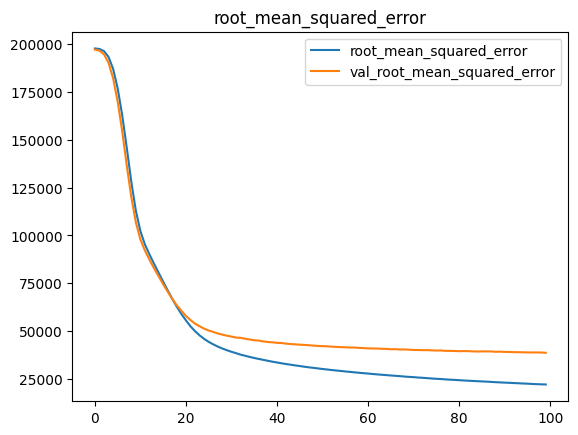

In [27]:
#create model architecture
input_shape = original_X_train_processed.shape[1]
 
reg_model4 = Sequential()

#Hidden layers
reg_model4.add(Dense(input_shape, input_dim=input_shape, activation='relu'))
reg_model4.add(Dense(input_shape * 0.5, activation='relu'))

#Output layer
reg_model4.add(Dense(1, activation='linear'))
 
#compile model with additional metrics
reg_model4.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
history4 = reg_model4.fit(original_X_train_processed, y_train,
                        validation_data = (original_X_test_processed, y_test),
                        epochs=100,
                        verbose=0)
# plot learning
plot_history(history4)

###Model 5

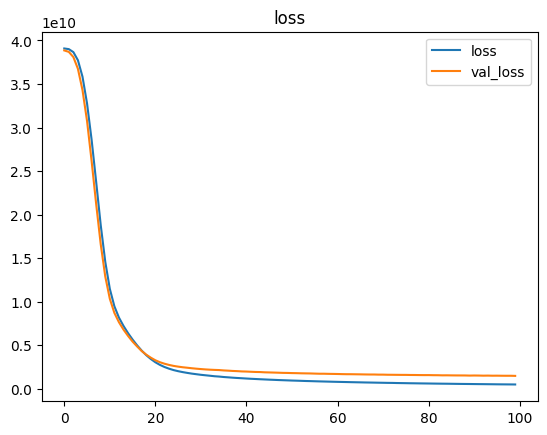

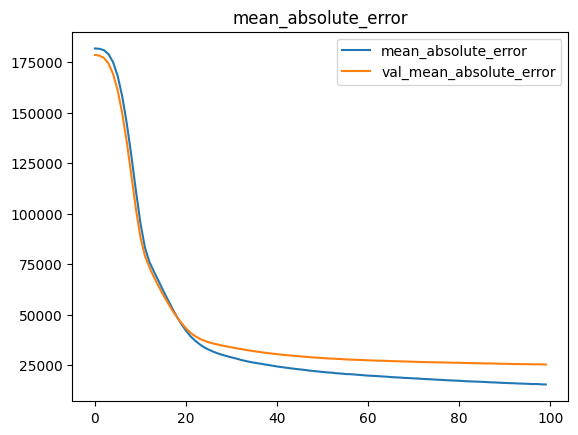

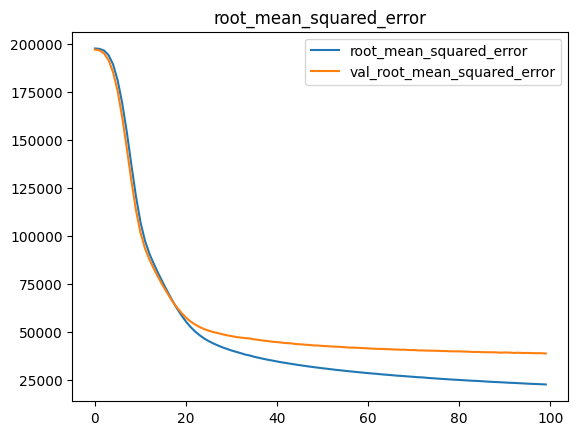

In [28]:
#create model architecture
input_shape = original_X_train_processed.shape[1]
 
reg_model5 = Sequential()

#Hidden layers
reg_model5.add(Dense(input_shape, input_dim=input_shape, activation='relu'))
reg_model5.add(Dense(input_shape * 0.5, activation='relu'))

#Output layer
reg_model5.add(Dense(1, activation='linear'))
 
#compile model with additional metrics
reg_model5.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
early_stopping = EarlyStopping(patience = 5)
history5 = reg_model5.fit(original_X_train_processed, y_train,
                        validation_data = (original_X_test_processed, y_test),
                        epochs=100,
                        verbose=0)
# plot learning
plot_history(history5)

###Model 6

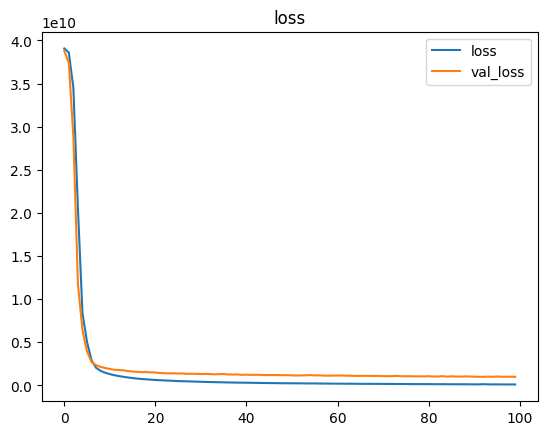

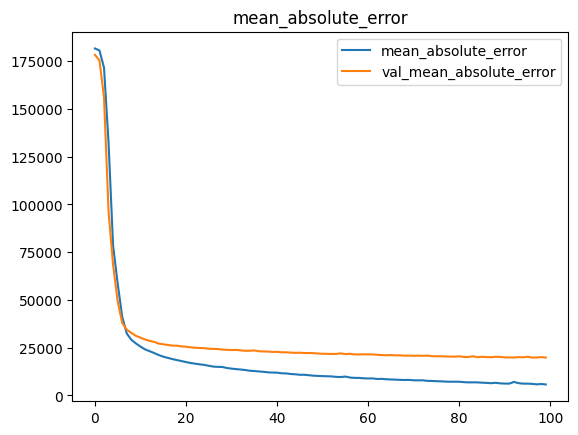

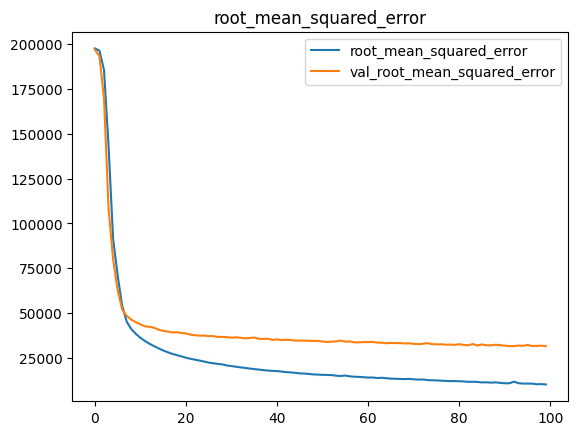

In [30]:
#create model architecture
input_shape = original_X_train_processed.shape[1]
 
reg_model6 = Sequential()

#Hidden layers
reg_model6.add(Dense(input_shape, input_dim=input_shape, activation='relu'))
reg_model6.add(Dense(input_shape * 0.5, activation='relu'))
reg_model6.add(Dense(input_shape * 0.25, activation='relu'))
#Output layer
reg_model6.add(Dense(1, activation='linear'))
 
#compile model with additional metrics
reg_model6.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
early_stopping = EarlyStopping(patience = 5)
history6 = reg_model6.fit(original_X_train_processed, y_train,
                        validation_data = (original_X_test_processed, y_test),
                        epochs=100,
                        verbose=0)
# plot learning
plot_history(history6)

#Determine Best Model

## On Engineered DF

In [31]:
# evaluate model
print('Model 1 Metrics')
model1_y_pred = reg_model1.predict(X_test_processed)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, model1_y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, model1_y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, model1_y_pred)}')
print(f'final R2: {r2_score(y_test, model1_y_pred)}')
print('\n')
print('Model 2 Metrics')
model2_y_pred = reg_model2.predict(X_test_processed)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, model2_y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, model2_y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, model2_y_pred)}')
print(f'final R2: {r2_score(y_test, model2_y_pred)}')
print('\n')
print('Model 3 Metrics')
model3_y_pred = reg_model3.predict(X_test_processed)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, model3_y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, model3_y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, model3_y_pred)}')
print(f'final R2: {r2_score(y_test, model3_y_pred)}')

Model 1 Metrics
12/12 [==============================] - 0s 1ms/step
final RMSE: 44674.99050513654
final MAE: 26000.028777825344
final MAPE: 0.1587892305423587
final R2: 0.7150939720543017


Model 2 Metrics
12/12 [==============================] - 0s 1ms/step
final RMSE: 44521.540150779314
final MAE: 25981.183271685037
final MAPE: 0.15792243622820984
final R2: 0.7170478100840478


Model 3 Metrics
12/12 [==============================] - 0s 2ms/step
final RMSE: 39447.66331507118
final MAE: 21933.283265999573
final MAPE: 0.13028167656184245
final R2: 0.7778658829477952


## On Original DF

In [32]:
print('Model 4 Metrics')
model4_y_pred = reg_model4.predict(original_X_test_processed)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, model4_y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, model4_y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, model4_y_pred)}')
print(f'final R2: {r2_score(y_test, model4_y_pred)}')
print('\n')
print('Model 5 Metrics')
model5_y_pred = reg_model5.predict(original_X_test_processed)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, model5_y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, model5_y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, model5_y_pred)}')
print(f'final R2: {r2_score(y_test, model5_y_pred)}')
print('\n')
print('Model 6 Metrics')
model6_y_pred = reg_model6.predict(original_X_test_processed)
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, model6_y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, model6_y_pred)}')
print(f'final MAPE: {mean_absolute_percentage_error(y_test, model6_y_pred)}')
print(f'final R2: {r2_score(y_test, model6_y_pred)}')

Model 4 Metrics
12/12 [==============================] - 0s 2ms/step
final RMSE: 38665.62758472701
final MAE: 25224.141416952054
final MAPE: 0.1581807848618277
final R2: 0.7865860384815487


Model 5 Metrics
12/12 [==============================] - 0s 2ms/step
final RMSE: 34994.751990901685
final MAE: 22023.693522581336
final MAPE: 0.13576839639228766
final R2: 0.8251850621071787


Model 6 Metrics
12/12 [==============================] - 0s 2ms/step
final RMSE: 31415.385010690108
final MAE: 19872.72442744007
final MAPE: 0.11982264186470666
final R2: 0.8591173625608532


Three different deep learning models are used and measured on both original and engineered data. Six models are compared and the result suggests that original data with 3 hidden layers, each with decreased neurons by 50% on previous layer along with early stopping, generates the over 85% of the variance in the target can be explained, the mean absolute error shows us that our model tends to make an error of about 19900 dollars, and since the root mean squared error is almost 50%  higher than the mean absolute error, this shows us that it has made some larger errors on some samples.

In summary, adding layers and including regularization help make models better.